### Importing Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

### Input Images

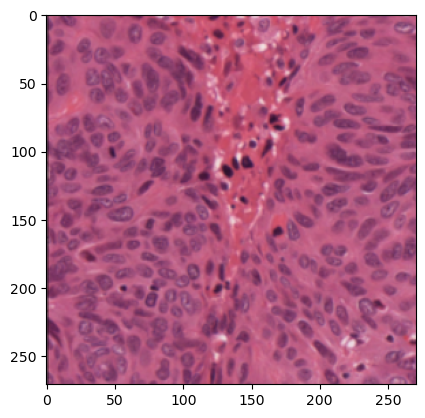

In [2]:
img = cv2.imread("nuclei.png")
plt.imshow(img)
plt.show()

## Output Image

TypeError: Image data of dtype object cannot be converted to float

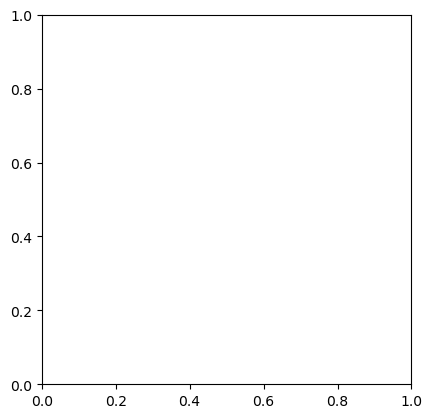

In [3]:
out_img = cv2.imread('/home/snucse/Desktop/SET-11/image_2_mask.png')
plt.imshow(out_img)

## Image processing

#### Convert to gray scale

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

#### Thresholding

In [ ]:
median = cv2.medianBlur(gray, 1)

In [ ]:
ret, bin_img = cv2.threshold(median,110, 255, cv2.THRESH_BINARY_INV)

In [ ]:
plt.imshow(bin_img,cmap='gray')

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN,kernel,iterations=2)

In [ ]:
plt.imshow(bin_img,cmap='gray')

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# sure background area
sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
axes[0, 0].imshow(sure_bg, cmap='gray')
axes[0, 0].set_title('Sure Background')

# Distance transform
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
axes[0, 1].imshow(dist, cmap='gray')
axes[0, 1].set_title('Distance Transform')

# foreground area
ret, sure_fg = cv2.threshold(bin_img, 0.5 * bin_img.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
axes[1, 0].imshow(sure_fg, cmap='gray')
axes[1, 0].set_title('Sure Foreground')

# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)
axes[1, 1].imshow(unknown, cmap='gray')
axes[1, 1].set_title('Unknown')

plt.show()

In [ ]:
ret, markers = cv2.connectedComponents(sure_fg)
 
# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0
 
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

In [ ]:
markers = cv2.watershed(img, markers)
 
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()
 
 
labels = np.unique(markers)
 
coins = []
for label in labels[2:]:  
 
# Create a binary image in which only the area of the label is in the foreground 
#and the rest of the image is in the background   
    target = np.where(markers == label, 255, 0).astype(np.uint8)
   
  # Perform contour extraction on the created binary image
    contours, hierarchy = cv2.findContours(
        target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    coins.append(contours[0])
 
# Draw the outline
# print(coins)
colours = [(255,255,51),(51,255,51),(0,255,255),(255,0,0),(255,51,153)]

for i in range(len(coins)):
    img = cv2.drawContours(img, coins[i], -1,random.choice(colours), thickness=3)
plt.imshow(img,cmap='gray')

## Result

In [ ]:
plt.subplot(1,2,1)
plt.imshow(out_img)
plt.axis("off")
plt.title("Expected output")

plt.subplot(1,2,2)
plt.imshow(img)
plt.axis("off")
plt.title("Obtained output")

plt.show()